# Lesson 1.6

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# generating an array of x values
x = np.arange(0,10,1)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

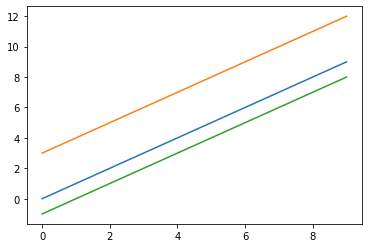

In [10]:
y = 1 * x
y2 = 3 + 1 * x
y3 = -1 + 1 * x
#here we are changing the y-intercept, which controls the height of the line

plt.plot(x,y)
plt.plot(x,y2)
plt.plot(x,y3)
plt.show()

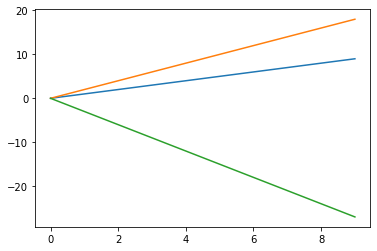

In [11]:
y = x 
y2 = 2*x 
y3 = -3*x
#here we are changing the gradient (aka coefficient), which controls the slope of the line

plt.plot(x,y)
plt.plot(x,y2)
plt.plot(x,y3)
plt.show()

In [ ]:
#The whole goal of Linear Regression is to find the "best" intercept and slope to "fit" our data!


In [ ]:
# apply linear regression on the following data

In [12]:
reg_data = pd.read_csv('regression_data.csv')
reg_data.head()

,HV1,IC1,IC2,IC3,IC4,IC5,AVGGIFT,TARGET_D
0,2000.0,458,453,495,469.0,19217,13.511111,38.0
1,817.0,213,256,240,236.0,8518,12.222222,10.0
2,1866.0,405,423,394,407.0,15709,23.857143,37.0
3,1174.0,268,282,298,283.0,10427,10.400000,12.0
4,3048.0,470,557,562,530.0,31631,8.222222,15.0


In [13]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

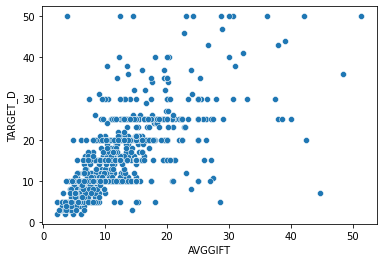

In [14]:
#let's pick the AVGGIFT variable as the one we think is the most explanatory
sns.scatterplot(x='AVGGIFT',y='TARGET_D',data=reg_data)
plt.show()

In [16]:
reg_data['TARGET_D'].corr(reg_data['AVGGIFT'])

0.7213639344820855

In [17]:
y = reg_data['TARGET_D']
X = reg_data[['AVGGIFT']]

In [18]:
# to perform the linear regression we'll use the sklearn implementation of linear regression
# we will use sklearn a lot

# we first create the model. This just tells python to be ready to use a linear model, it does not actually compute anything yet

from sklearn import linear_model
from sklearn.metrics import mean_squared_error

lm = linear_model.LinearRegression()

In [19]:
%%time
# we now "fit" (a.k.a. "train") the model in our data
# linear regression picks the line (i.e. the intercept and the gradient) that best "fits" our data
# we will get to the meaning of "fitting the data" in a second

lm.fit(X,y)
print(lm.intercept_)
print(lm.coef_) # coefficients is an array because later we will see we can have more than one dimension for our gradient

3.673182698423581
[0.95595086]
Wall time: 24 ms


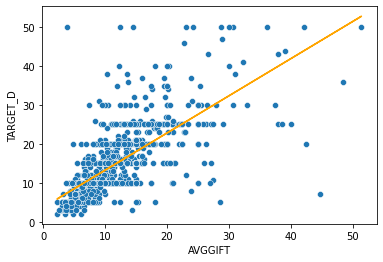

In [23]:
#let's visualize this result
regression_line = lm.intercept_ + lm.coef_[0]*reg_data['AVGGIFT']
plt.plot(reg_data['AVGGIFT'], regression_line, c = 'orange')
sns.scatterplot(x='AVGGIFT',y='TARGET_D',data=reg_data)
plt.show()

In [29]:
#we can use this model to predict new or unseen datapoints
lm.predict([[10],[20],[30]])
#what does this mean

array([13.23269127, 22.79219984, 32.3517084 ])

In [31]:
#the score is not great, but we have not performed any data preparation yet
print('R2-score is', lm.score(X,y))

y_pred = lm.predict(X)
print(mean_squared_error(y_pred,y))

R2-score is 0.5203659259714741
37.60456685082154


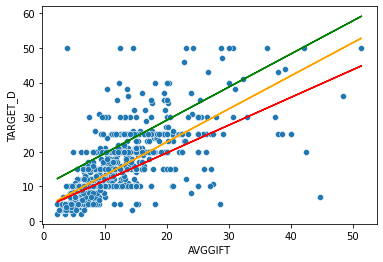

In [32]:
#any other line would have a worst result
regression_line = lm.intercept_ + lm.coef_[0]*reg_data['AVGGIFT']
plt.plot(reg_data['AVGGIFT'], regression_line, c = 'orange')
regression_line_2 = lm.intercept_ + 0.8*reg_data['AVGGIFT']
plt.plot(reg_data['AVGGIFT'], regression_line_2, c = 'red')
regression_line_3 = 10 + lm.coef_[0]*reg_data['AVGGIFT']
plt.plot(reg_data['AVGGIFT'], regression_line_3, c = 'green')
sns.scatterplot(x='AVGGIFT',y='TARGET_D',data=reg_data)
plt.show()

In [33]:
print("MSE fitted line is ", round(mean_squared_error(regression_line, y),2))
print("MSE line 2 is      ", round(mean_squared_error(regression_line_2, y),2))
print("MSE line 3 is      ", round(mean_squared_error(regression_line_3, y),2))

MSE fitted line is  37.6
MSE line 2 is       42.09
MSE line 3 is       77.63


In [35]:
#let's bring in more variables
y = reg_data['TARGET_D']
X2 = reg_data.drop(['TARGET_D'], axis=1)
lm = linear_model.LinearRegression()
lm.fit(X2,y)
print(lm.score(X,y))
y_pred = lm.predict(X2)
print(mean_squared_error(y_pred,y))
#results are better, but now we cannot visualize them

0.5640186699298624
34.182077462990065


In [74]:
print(lm.intercept_)
print(lm.coef_)

3.7604323600782497
[ 2.59524877e-03 -1.02519484e-01 -9.54071068e-02 -9.46876520e-02
  2.89332425e-01 -1.26561451e-04  8.56301222e-01]


# Checking assumptions

In [ ]:
# THIS IS PROBABLY THE MOST IMPORTANT LINE IN THIS NOTEBOOK
# the best variables are those that have a high correlation with the target (you want to predict, always the y), but low correlation between themselves

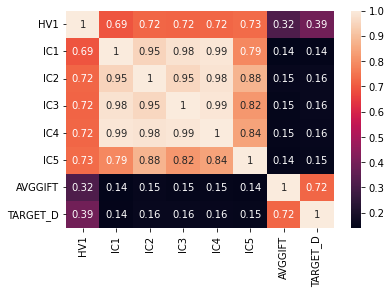

In [36]:
correlations_matrix = reg_data.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [76]:
# We can see that there is a very strong positive correlation between IC1 and IC2, IC2 and IC3, IC3 and IC4
# using the concept of multicollinearity, lets drop IC2, IC3 and IC4

In [37]:
reduced_data = reg_data.drop(['IC2', 'IC3', 'IC4'],axis=1)
reduced_data.columns

Index(['HV1', 'IC1', 'IC5', 'AVGGIFT', 'TARGET_D'], dtype='object')

In [39]:
from sklearn import linear_model
y = reduced_data['TARGET_D']
X = reduced_data.drop(['TARGET_D'], axis=1)
lm = linear_model.LinearRegression()
lm.fit(X,y)
print(lm.score(X,y))
y_pred=lm.predict(X)
print(mean_squared_error(y_pred,y))

0.5638520209627318
34.19514317821843
